<a href="https://colab.research.google.com/github/KarimElAtbany/FWD/blob/main/fwd_bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.1 MB/s 


In [10]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"karimnabel","key":"34ed24ee02ccbe067a4b5421c0ffa0df"}'}

In [13]:
import opendatasets as od
import pandas as pd
from autogluon.tabular import TabularPredictor



In [12]:


od.download("https://www.kaggle.com/competitions/bike-sharing-demand/data")


100%|██████████| 189k/189k [00:00<00:00, 24.5MB/s]


Extracting archive ./bike-sharing-demand/bike-sharing-demand.zip to ./bike-sharing-demand


In [16]:
train=pd.read_csv('/content/bike-sharing-demand/train.csv')

In [39]:
tr=train.drop(['casual','registered'],axis=1)

In [41]:
tr.head(-10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,317
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,164
10873,2012-12-19 11:00:00,4,0,1,1,16.40,20.455,54,15.0013,200
10874,2012-12-19 12:00:00,4,0,1,1,16.40,20.455,54,19.0012,236


In [20]:
test=pd.read_csv('/content/bike-sharing-demand/test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [28]:
submission =pd.read_csv('/content/bike-sharing-demand/sampleSubmission.csv')
submission.head(10)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
5,2011-01-20 05:00:00,0
6,2011-01-20 06:00:00,0
7,2011-01-20 07:00:00,0
8,2011-01-20 08:00:00,0
9,2011-01-20 09:00:00,0


In [42]:
predictor = TabularPredictor("count").fit(train_data=tr,time_limit=600,presets="best_quality")


Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220905_201644/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220905_201644/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.13
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 9
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.l

In [35]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   -1.864620      41.563247  574.778855                0.000702           0.223223            3       True         13
1   RandomForestMSE_BAG_L2   -1.932161      27.918219  414.814162                0.481678          21.783002            2       True         12
2      WeightedEnsemble_L2   -2.027949      27.228574  393.464914                0.001224           0.518181            2       True          9
3          LightGBM_BAG_L2   -2.331777      28.242913  422.437397                0.806372          29.406238            2       True         11
4     ExtraTreesMSE_BAG_L1   -2.546826       0.580026    6.348340                0.580026           6.348340            1       True          7
5   RandomForestMSE_BAG_L1   -2.818102       0.556504   12.705392         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -4.209633576322336,
  'LightGBM_BAG_L1': -3.124825813111386,
  'RandomForestMSE_BAG_L1': -2.818101666011887,
  'CatBoost_BAG_L1': -3.078015883709377,


In [45]:
predictions = predictor.predict(test)
predictions.head(-5)

0        23.346117
1        41.180969
2        45.361660
3        48.772820
4        51.385448
           ...    
6483    162.112900
6484    158.795319
6485    162.708771
6486    157.135040
6487    155.388290
Name: count, Length: 6488, dtype: float32

In [49]:
predictions.describe()

count    6493.000000
mean      100.675423
std        90.149933
min         2.983873
25%        20.739618
50%        63.030727
75%       170.093842
max       364.734436
Name: count, dtype: float64

In [52]:
predictions.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [54]:
predictions.iloc[predictions<0]=0


In [59]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [63]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 754kB/s]
500 - An internal server error occurred. Please ensure that your API client is up to date. If it is, please report a bug at github.com/Kaggle/kaggle-api


In [64]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-09-05 20:50:55  first raw submission  complete  1.80606      1.80606       


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa698cdb3d0>,
      dtype=object)

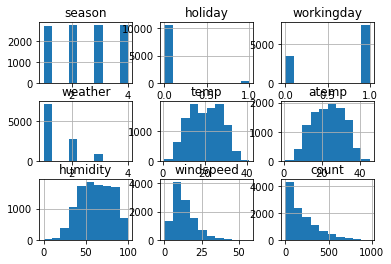

In [67]:
tr.hist()

In [73]:
tr["season"] = tr["season"].astype("category")
tr["weather"] = tr["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [75]:
tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5fbe2d250>,
      dtype=object)

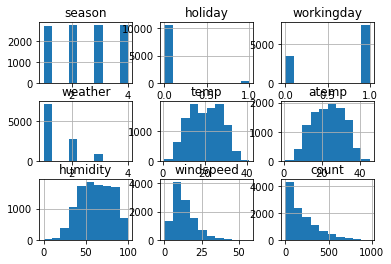

In [77]:
tr.hist()

In [78]:
predictor_new_features = TabularPredictor(label="count", learner_kwargs={'ignored_columns': ["casual", "registered"]}).fit(
    train_data=train, time_limit=600, presets="best_quality"
)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220905_210641/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220905_210641/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.13
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 11
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

In [80]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.729434      16.086134  513.661010                0.001041           0.307529            3       True         14
1   RandomForestMSE_BAG_L2  -53.035370      12.051811  424.525371                0.685754          33.516773            2       True         12
2          LightGBM_BAG_L2  -54.655204      11.705823  419.876420                0.339766          28.867822            2       True         11
3          CatBoost_BAG_L2  -56.757612      11.491076  445.551987                0.125019          54.543389            2       True         13
4        LightGBMXT_BAG_L2  -60.692535      15.059573  450.968886                3.693516          59.960288            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.214074    0.108681         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.15924850163722,
  'LightGBM_BAG_L1': -130.67501424016515,
  'RandomForestMSE_BAG_L1': -116.

In [86]:
submission_new_features = pd.read_csv('/content/bike-sharing-demand/sampleSubmission.csv', parse_dates=["datetime"])
submission_new_features["count"] = predictor_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [87]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 647k/647k [00:00<00:00, 3.39MB/s]
Successfully submitted to Bike Sharing Demand

In [88]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2022-09-05 21:19:10  new features          pending                              
submission.csv               2022-09-05 20:50:55  first raw submission  complete  1.80606      1.80606       


In [90]:
predictor_new_hpo = TabularPredictor(label="count", learner_kwargs={'ignored_columns': ["casual", "registered"]}).fit(
    train_data=train, time_limit=600, num_bag_folds=5, num_bag_sets=1, num_stack_levels=1, presets="best_quality"
)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220905_211945/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220905_211945/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.13
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 11
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.l

In [91]:
predictor_new_hpo.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.900797      10.237876  424.672289                0.000830           0.380838            3       True         17
1   RandomForestMSE_BAG_L2  -53.439173       9.346826  401.089678                0.672038          31.695212            2       True         13
2     ExtraTreesMSE_BAG_L2  -53.998358       9.337045  378.781536                0.662257           9.387070            2       True         15
3          LightGBM_BAG_L2  -55.242393       8.902751  383.209168                0.227963          13.814703            2       True         12
4          CatBoost_BAG_L2  -55.965240       8.808997  453.647308                0.134209          84.252843            2       True         14
5        LightGBMXT_BAG_L2  -61.501573      12.123764  403.214573         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.546199084

In [92]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.iloc[predictions_new_hpo.lt(0)] = 0

In [93]:
submission_new_hpo = pd.read_csv('/content/bike-sharing-demand/sampleSubmission.csv', parse_dates=["datetime"])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [94]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"


100% 188k/188k [00:00<00:00, 998kB/s]
Successfully submitted to Bike Sharing Demand

In [95]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6


fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-09-05 21:30:14  new features with hyperparameters  pending                              
submission_new_features.csv  2022-09-05 21:19:10  new features                       error                                
submission.csv               2022-09-05 20:50:55  first raw submission               complete  1.80606      1.80606       


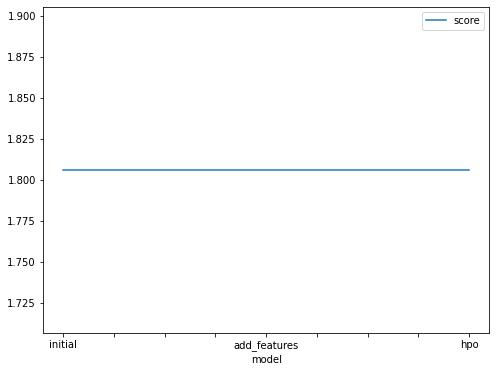

In [96]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.80606, 1.80606 ,1.80606]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

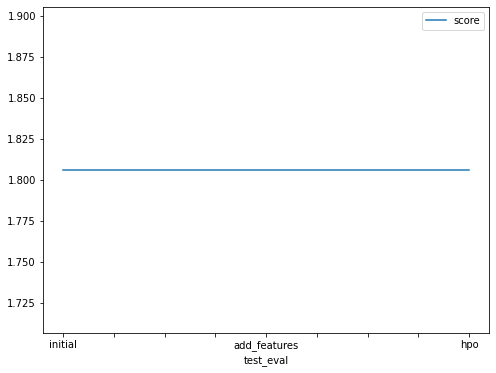

In [97]:
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80606,1.80606,1.80606]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

In [98]:
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_bag_folds": [0, 0, 5],
    "num_bag_sets": [20, 20, 1],
    "num_stack_levels": [0, 0, 1],
    "score": [1.80606, 1.80606,1.80606]
})

,model,num_bag_folds,num_bag_sets,num_stack_levels,score
0,initial,0,20,0,1.80606
1,add_features,0,20,0,1.80606
2,hpo,5,1,1,1.80606
